# Text procession

In [13]:
import math

docs = [
    "asked date distribution expires frequently gmt keywords may questions upcoming world",
    "die following gave god john loved much offers paraphrase place son us world",
    "asked date distribution expires frequently gmt keywords may questions space world",
    "cambridge consultants distribution lines logic mantis organization supersedes uk world",
    "carolina chapel distribution hill lines north organization supersedes university world",
    "article asphaug asphaug distribution erik lines organization sunconnect world writes",
    "article champion distribution havemann minnesota organization paul paul twins usa world writes",
    "approaching april armenians around family getting government massacres members ready remember turkish world",
    "bought csr friend hey kaw motorcycles new pretty used wonderful world",
    "come creed dead life look resurrection world",
    "available bases beach blades cup following gameboy games ii loaded malibu metroid pitfighter robocop soccer spiderman steel t",
    "article baby canada championships munich scored take today white world writes",
    "add clipper debate distribution expires first lines reading things world",
    "citizens citizens clearly countries cruptology encrypting listing policies private status throughout world",
    "ago announcement bindings days got hello lines motif per posted requests send several update world",
    "article boston hey luddington see series shawn valentine world writes",
    "anonymous around chaining files found ftp graphical interesting looking meshes program studio stuff world",
    "article excerpt jrm might missed news report world writes",
    "bring dealer defect distribution flyback monitors replace world",
    "attempting hello ibm pc purposes simulator students teaching workings world write"
]
doc_set = list(set(doc.split()) for doc in docs)

In [14]:
def count_PPMI(docs, w0, w1) -> float:
    both_count = 0
    w0_count = 0
    w1_count = 0
    for doc in docs:
        if w0 in doc:
            w0_count += 1
        if w1 in doc:
            w1_count += 1
        if w1 in doc and w0 in doc:
            both_count += 1
    
    return max(0.0, math.log2((len(docs)*both_count) / (w0_count * w1_count)))
    
      

Введите значение PPMI
 для термов `lines` и `organization`:

In [15]:
print("%.3f" % count_PPMI(doc_set, "lines", "organization"))

1.585


Введите значение PPMI
 для термов `article` и `world`:

In [16]:
print("%.3f" % count_PPMI(doc_set, "article", "world"))

0.074


Введите значение PPMI
 для термов `world` и `organization`:

In [17]:
print("%.3f" % count_PPMI(doc_set, "world", "organization"))

0.074


# Image procession

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt

1. С помощью библиотеки OpenCV считайте изображение и преобразуйте в палитру RGB:

In [19]:
image = cv2.imread(r"image_processing\data\Test_exam\1.jpg", cv2.COLOR_BGR2RGB)

2. Сожмите изображение (далее сжатое изображение) до ширины `2304`, соблюдая пропорции исходного изображения. Важно: коэффициент отношения сторон при вычислениях не округляйте. Если высота не окажется целой, округлите значение до целого в меньшую сторону. Используйте `cv2.resize()` с параметром `interpolation = cv2.INTER_AREA`.

In [20]:
new_w = 2304
koeff = image.shape[1] / image.shape[0]
new_image = cv2.resize(image, (new_w, int(new_w / koeff)), interpolation = cv2.INTER_AREA)
print("w / h = %.3f" % koeff)
print("new_h =", new_image.shape[0])


w / h = 1.333
new_h = 1728


3. Постройте гистограмму сжатого изображения в палитре RGB. Сравните оценку плотностей распределения интенсивностей по каналам R, G и B.

Введите наибольшее значение плотности среди трех каналов (результат введите с точностью до 4 знаков после запятой):

max_p: 0.0185


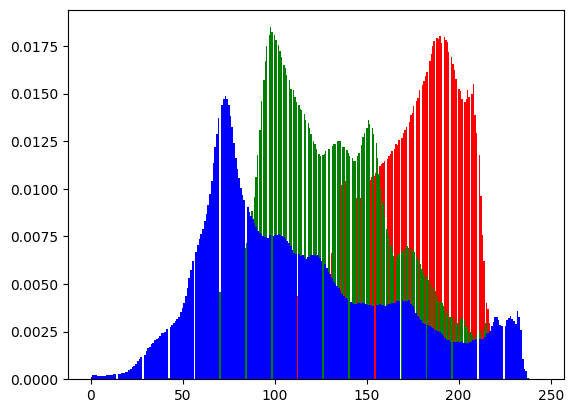

In [21]:
max_p = 0
colors = ["red", "green", "blue"]
for i in range(image.shape[2]):
    hist = plt.hist(new_image[:, :, i].ravel(), bins=256, color=colors[i], density=True)
    max_p = max(max_p, max(hist[0]))
print("max_p: %.4f" % max_p)

4. Выполните линейную нормировку и растяжение на диапазон `0−255`
 гистограммы по каналам R, G и B сжатого изображения.

Определите интенсивность каналов R, G, B для пикселя, находящегося на пересечении `891`
 строки и `1146`
 столбца матричного представления изображения.

In [26]:
norm_image = new_image.copy()
for i in range(image.shape[2]):
    norm_image[:, :, i] = (norm_image[:, :, i] - norm_image[:, :, i].min()) / (norm_image[:, :, i].max() - norm_image[:, :, i].min()) * 255
b, g, r = norm_image[891][1146]
print("r:", r)
print("g:", g)
print("b:", b)

r: 152
g: 157
b: 184


5. Выполните вейвлет-преобразование Хаара для изображения полученного после шага 4.

In [23]:
cA, _ = pywt.dwt2(cv2.cvtColor(norm_image, cv2.COLOR_BGR2GRAY), 'haar')

6. Выполните повторное вейвлет-преобразование Хаара для набора `cA` шага 5.

In [24]:
c = pywt.dwt2(cA, 'haar')
cA1, (cH1, cV1, cD1) = c

7. Обнулите коэффициенты меньшие по модулю значения threshold = `90` набора `cA1`.

Введите количество таких коэффициентов:

In [25]:
threshold = 90
h1 = cA1.shape[0]
zeros = 0
for i in range(h1):
    c[0][i][np.abs(c[0][i])<threshold] = 0.0
    zeros += len(c[0][i][np.abs(c[0][i])<threshold]) 
zeros

286